# Phase 1 - Week 3 - Day 3 PM - Time Series: Part 2

# A. Data Loading

In [1]:
# Import library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data loading

passenger=pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w3/P1W3D3AM%20-%20Time%20Series%20-%20Part%201%20-%20Air%20Passengers.csv')
passenger

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [3]:
# Check info dataset

passenger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    144 non-null    object
 1   value   144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


Text(0, 0.5, 'Num of Passengers')

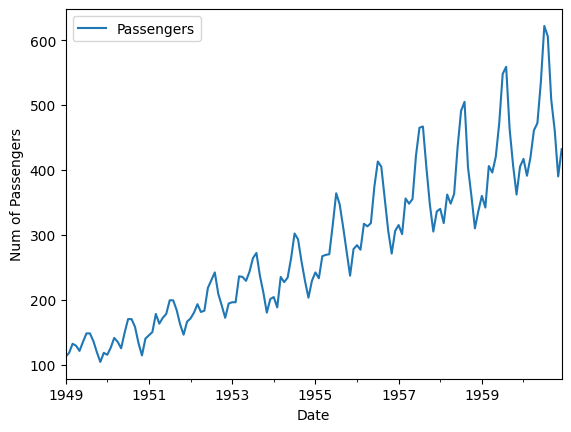

In [4]:
# Plot the data

passenger.columns = ['Date', 'Passengers']
passenger.Date = pd.to_datetime(passenger.Date)
passenger.set_index('Date',inplace=True)
passenger.plot()
plt.xlabel('Date')
plt.ylabel('Num of Passengers')

In [5]:
# Check the dataframe

passenger.head()

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# B. Time Series Decomposition

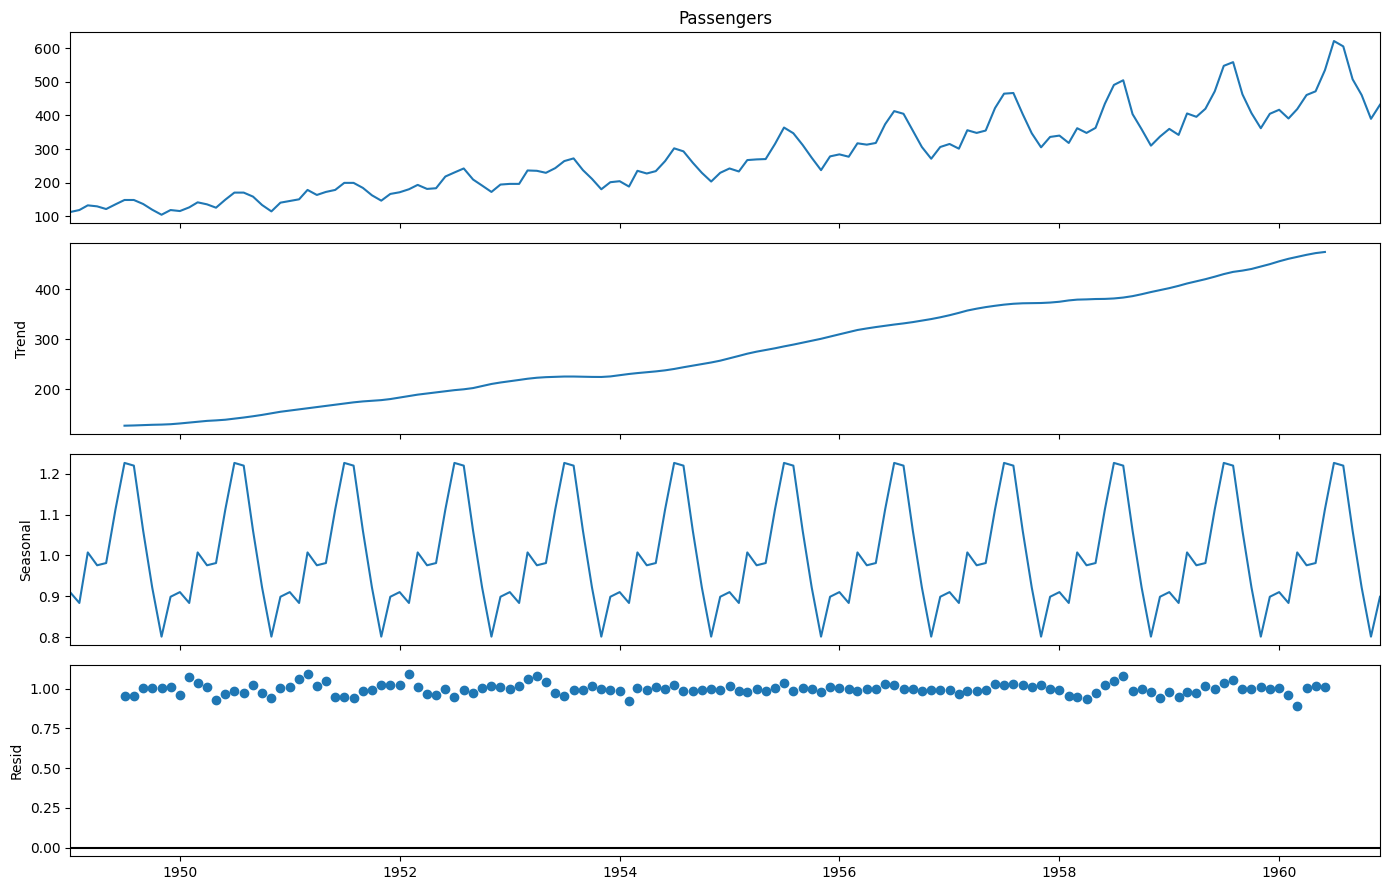

In [6]:
# Decompose the components from the time series.

import pylab
from statsmodels.tsa.seasonal import seasonal_decompose

pylab.rcParams['figure.figsize'] = (14, 9)
res = seasonal_decompose(passenger['Passengers'], model='multiplicatif')
ax=res.plot()
plt.show()

# C. Stationarity

## C.1 - Without Differencing

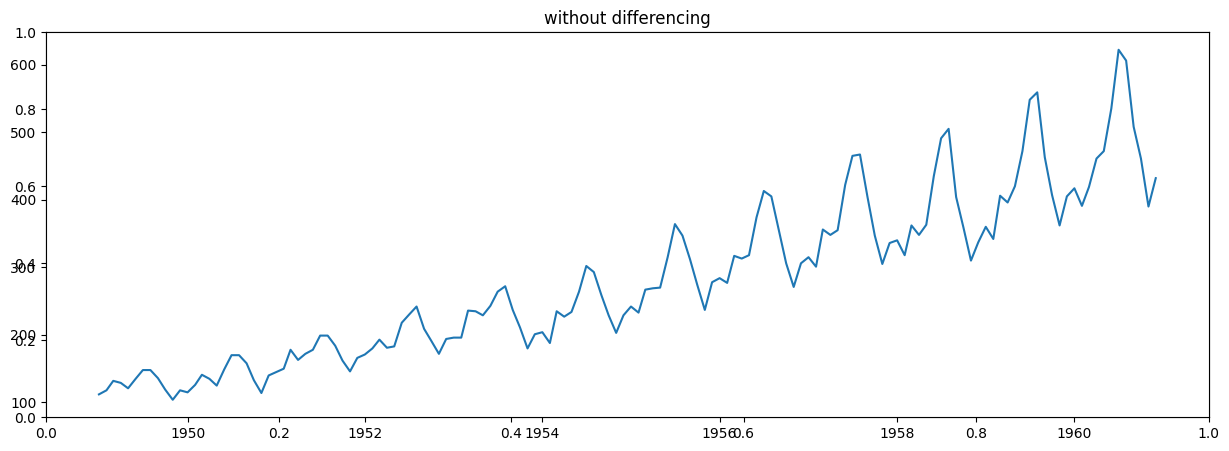

In [7]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(passenger['Passengers'])

## C.2 - First-Order Differencing

In [8]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [9]:
# Check stationarity of the dataset

check_stationarity(passenger['Passengers'])

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Non-stationary


In [10]:
# Perform first-order differencing

diff1 = passenger['Passengers'].diff()
diff1

Date
1949-01-01     NaN
1949-02-01     6.0
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
              ... 
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
1960-11-01   -71.0
1960-12-01    42.0
Name: Passengers, Length: 144, dtype: float64

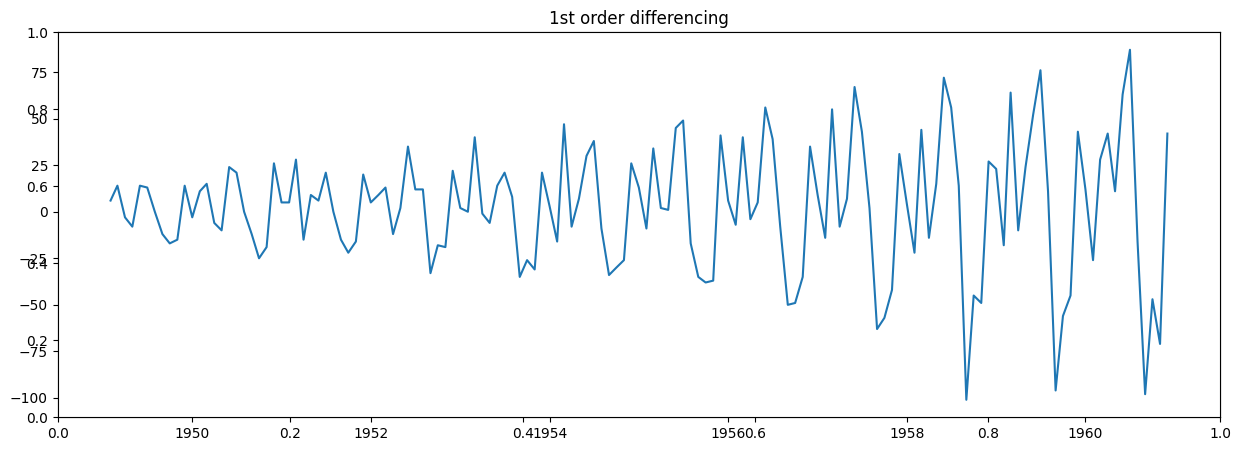

In [11]:
# Plot the result after first-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(diff1)

In [12]:
# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(diff1.dropna())

1st order differencing
ADF Statistic: -2.829267
p-value: 0.054213
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Non-stationary


## C.3 - Second-Order Differencing

In [13]:
# Perform second-order differencing

diff2 = passenger['Passengers'].diff().diff()
diff2

Date
1949-01-01      NaN
1949-02-01      NaN
1949-03-01      8.0
1949-04-01    -17.0
1949-05-01     -5.0
              ...  
1960-08-01   -103.0
1960-09-01    -82.0
1960-10-01     51.0
1960-11-01    -24.0
1960-12-01    113.0
Name: Passengers, Length: 144, dtype: float64

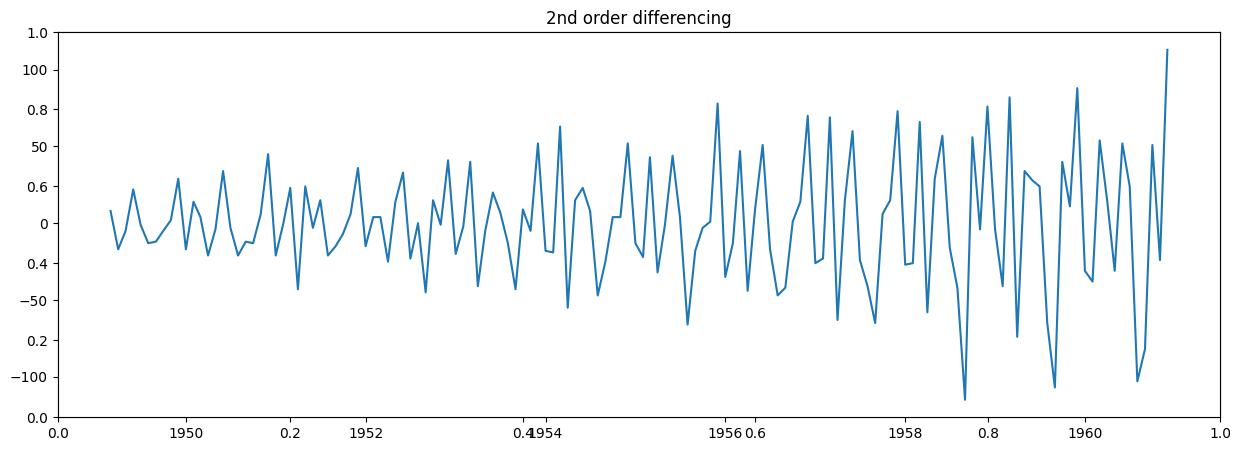

In [14]:
# Plot the result after second-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('2nd order differencing')
ax1.plot(passenger['Passengers'].diff().diff())

In [15]:
# Check stationarity after performing second-order differencing

print("2nd order differencing")
check_stationarity(passenger['Passengers'].diff().diff().dropna())

2nd order differencing
ADF Statistic: -16.384232
p-value: 0.000000
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Stationary


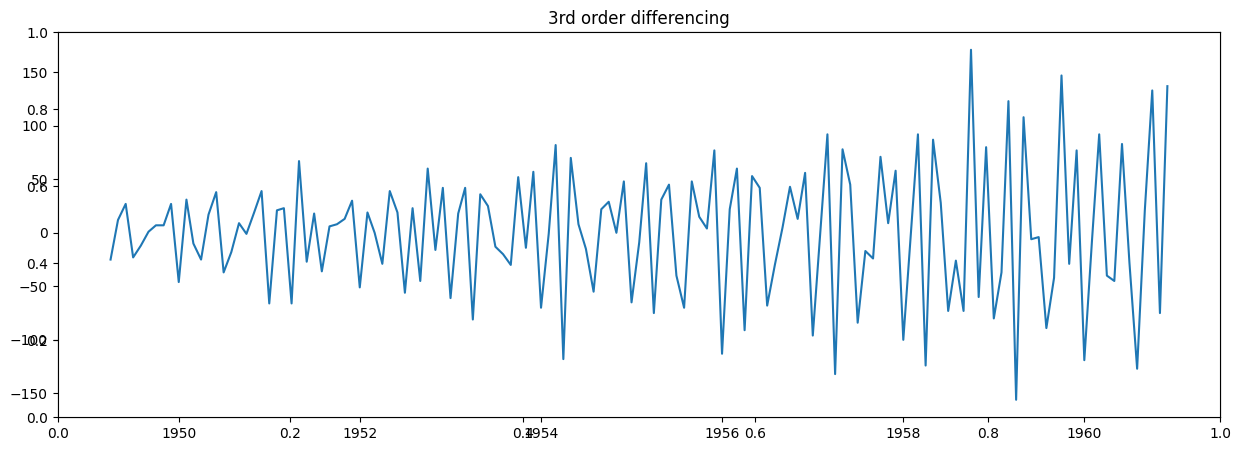

In [16]:
# Plot the result after third-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('3rd order differencing')
ax1.plot(passenger['Passengers'].diff().diff().diff())

# D. ACF & PACF

To determine the value of `p` and `q`, you can follow the following recommendation :

**For Moving Average (MA) :**
* `MA(q)`.
* The value of `q` is taken from cut off of the ACF plot.

**For Auto Regressive (AR) :**
* `AR(p)`.
* The value of `p` is taken from cut off of the PACF plot.

**For Auto Regressive Moving Average (ARMA) :**
* `ARMA(p, q)`
* The value of cut off from ACF plot & PACF plot can be used as `p` or `q`.

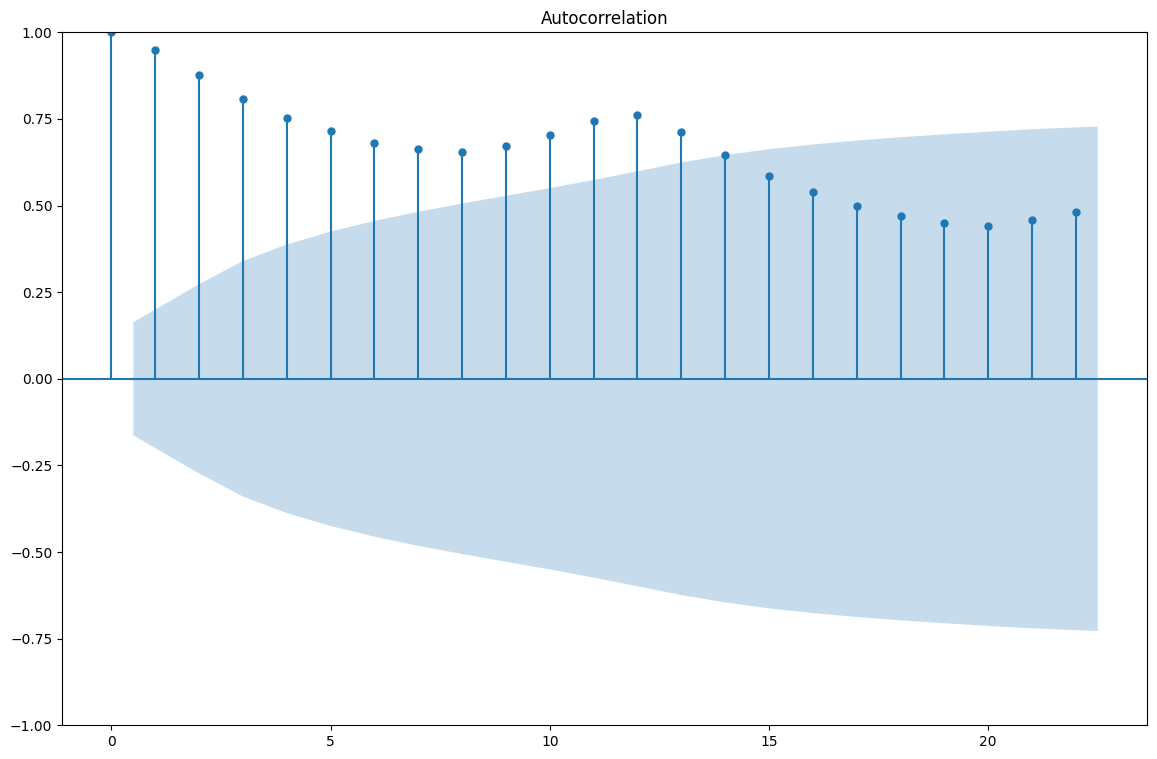

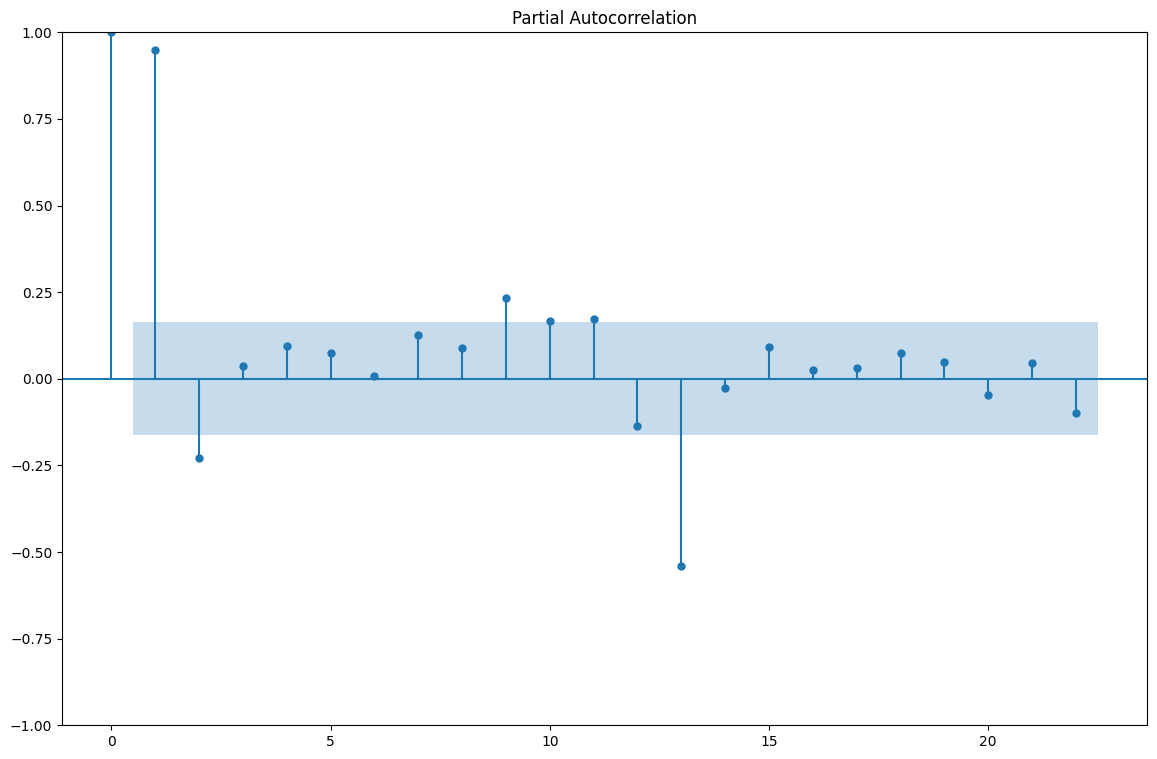

In [17]:
# Plot ACF & PACF from the original dataset

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(passenger['Passengers'])
plot_pacf(passenger['Passengers'])
plt.show()

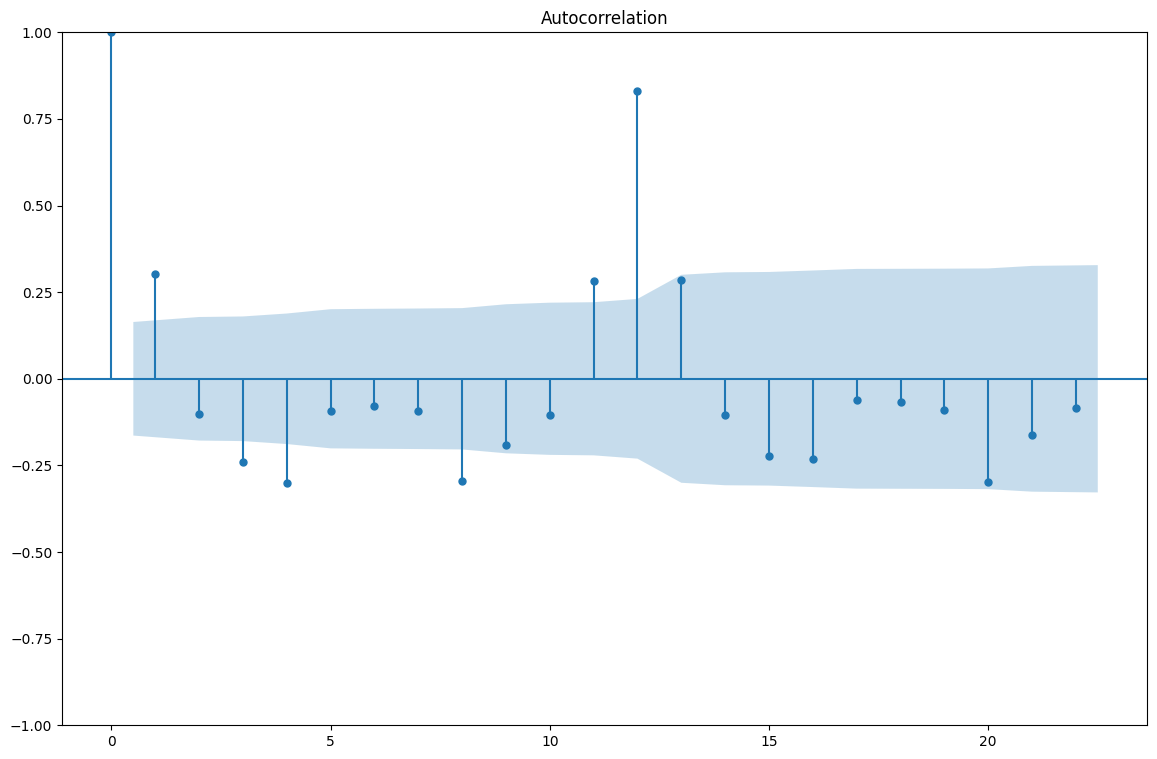

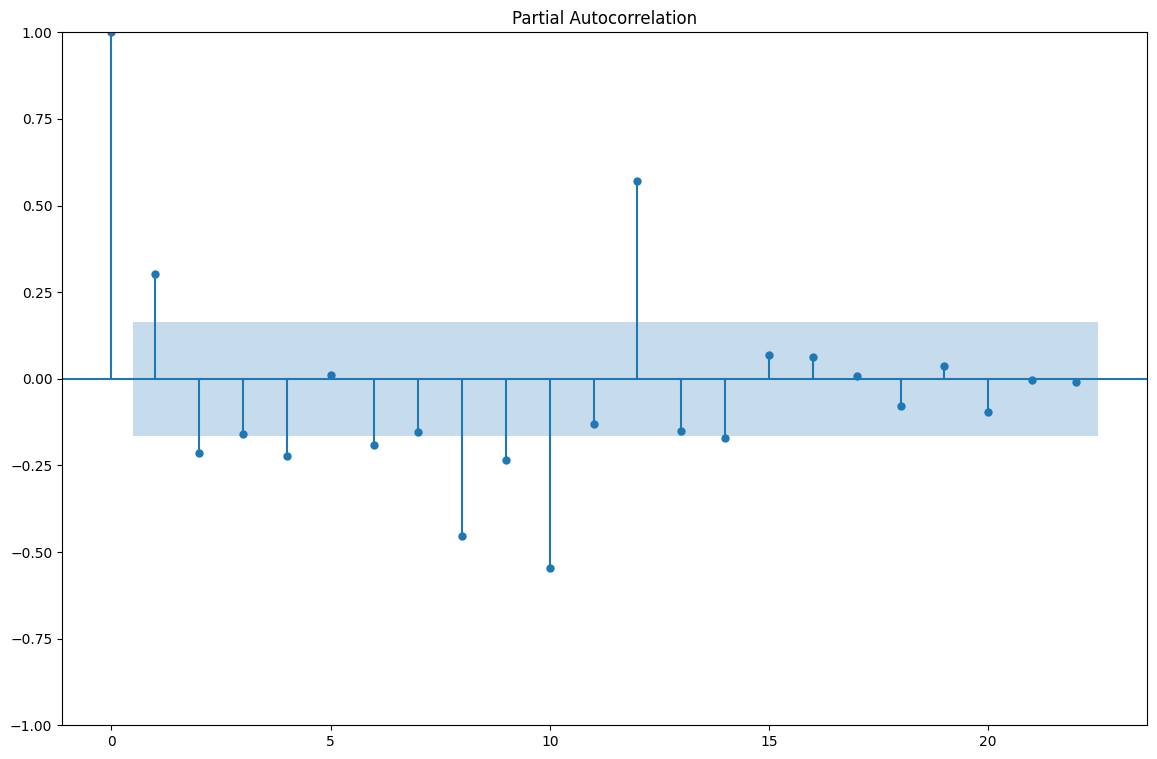

In [18]:
# Plot ACF & PACF after performing first-order differencing

plot_acf(passenger['Passengers'].diff().dropna())
plot_pacf(passenger['Passengers'].diff().dropna())
plt.show()

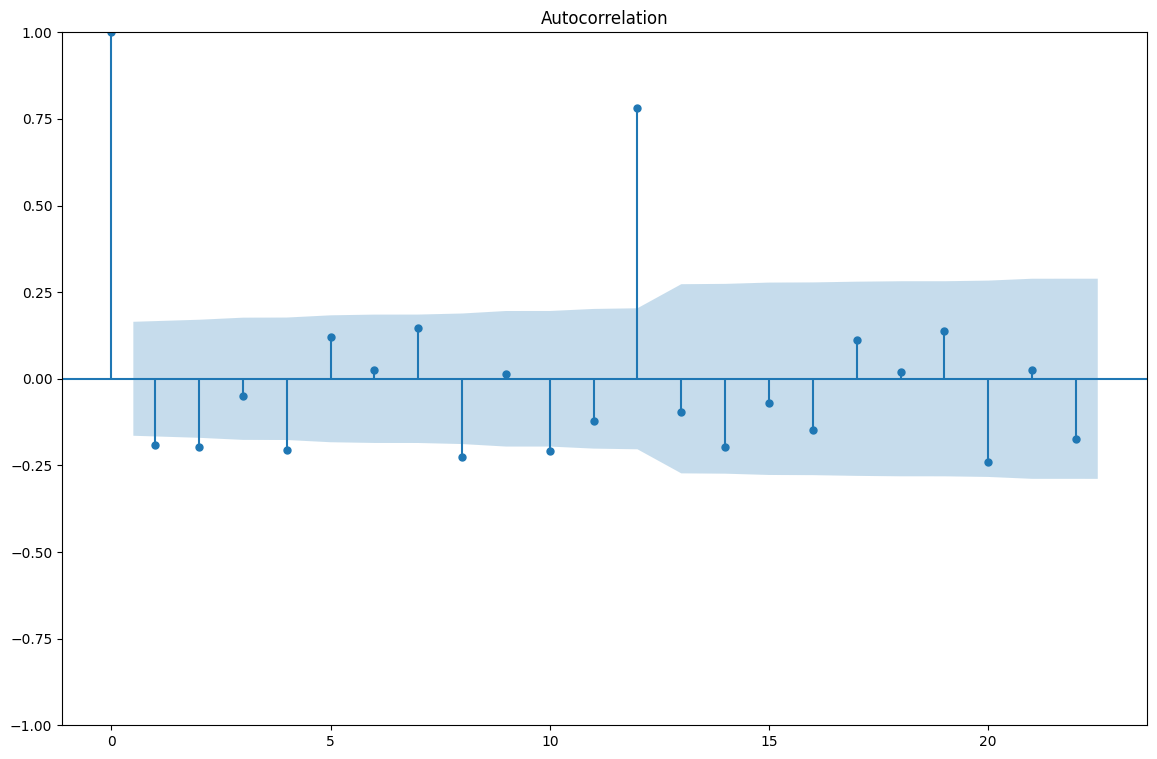

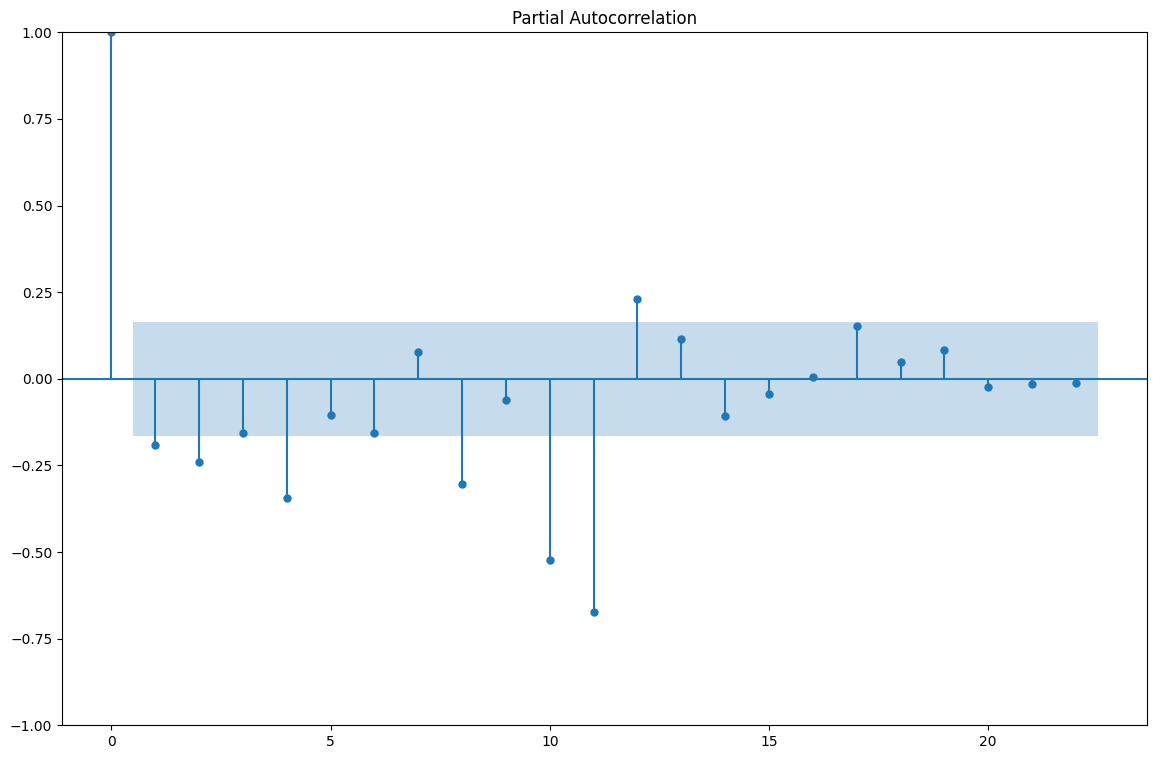

In [19]:
# Plot ACF & PACF after performing second-order differencing

plot_acf(passenger['Passengers'].diff().diff().dropna())
plot_pacf(passenger['Passengers'].diff().diff().dropna())
plt.show()

# E. ARIMA

In [20]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [21]:
# Find best model of ARIMA with combinations of p=4, d=4, q=4

%%time
find_best_model(passenger['Passengers'], 4, 4, 4)

CPU times: user 45.1 s, sys: 41.3 s, total: 1min 26s
Wall time: 1min 8s


(4,
 1,
 4,
 1342.3904057274283,
      p  d  q          AIC
 109  4  1  4  1342.390406
 83   3  1  3  1345.939602
 84   3  1  4  1350.991204
 57   2  1  2  1353.346641
 59   2  1  4  1362.330830
 ..  .. .. ..          ...
 70   2  4  0  1574.396123
 1    0  0  1  1618.862527
 45   1  4  0  1631.367521
 20   0  4  0  1700.455781
 0    0  0  0  1790.367581
 
 [125 rows x 4 columns])

In [22]:
# Train ARIMA with best combinations

model_arima_414 = ARIMA(passenger['Passengers'], order=(4, 1, 4))
result_model_arima_414 = model_arima_414.fit()

print('The AIC is ', result_model_arima_414.aic)

The AIC is  1342.3904057274283


In [23]:
# Predict next 12 months

len_dataset = passenger.shape[0]
len_predict = len_dataset + 12

new_pred = result_model_arima_414.predict(len_dataset, len_predict)
new_pred = pd.DataFrame(new_pred)
new_pred.columns=['Passengers']
all_dataset_with_pred = pd.concat([passenger, new_pred], axis=0)

In [24]:
# Original dataset

passenger.tail(5)

,Passengers
Date,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [25]:
# Prediction of next 12 months

new_pred

,Passengers
1961-01-01,427.926935
1961-02-01,433.788722
1961-03-01,469.213591
1961-04-01,487.853995
1961-05-01,526.318701
1961-06-01,536.927125
1961-07-01,546.046751
1961-08-01,538.942532
1961-09-01,516.761417
1961-10-01,501.090431


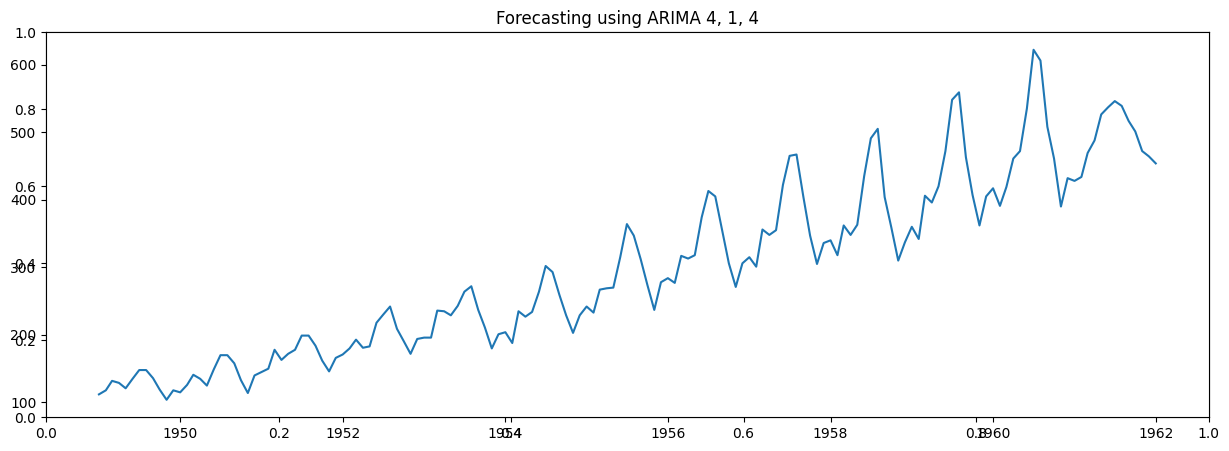

In [26]:
# Plot all dataset including prediction

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('Forecasting using ARIMA 4, 1, 4')
ax1.plot(all_dataset_with_pred)

## Modeling

In [27]:
# Splitting dataset

train = passenger[:80]
test = passenger[80:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (80, 1)
Test size :  (64, 1)


In [28]:
# Stationarity check

check_stationarity(train['Passengers'])

ADF Statistic: 0.638077
p-value: 0.988518
Critical Values:
	1%: -3.532
	5%: -2.906
	10%: -2.590
Non-stationary


In [29]:
# First-order differencing

check_stationarity(train['Passengers'].diff().dropna())

ADF Statistic: -1.967485
p-value: 0.301009
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Non-stationary


In [30]:
# Second-order differencing

check_stationarity(train['Passengers'].diff().diff().dropna())

ADF Statistic: -9.561093
p-value: 0.000000
Critical Values:
	1%: -3.534
	5%: -2.906
	10%: -2.591
Stationary


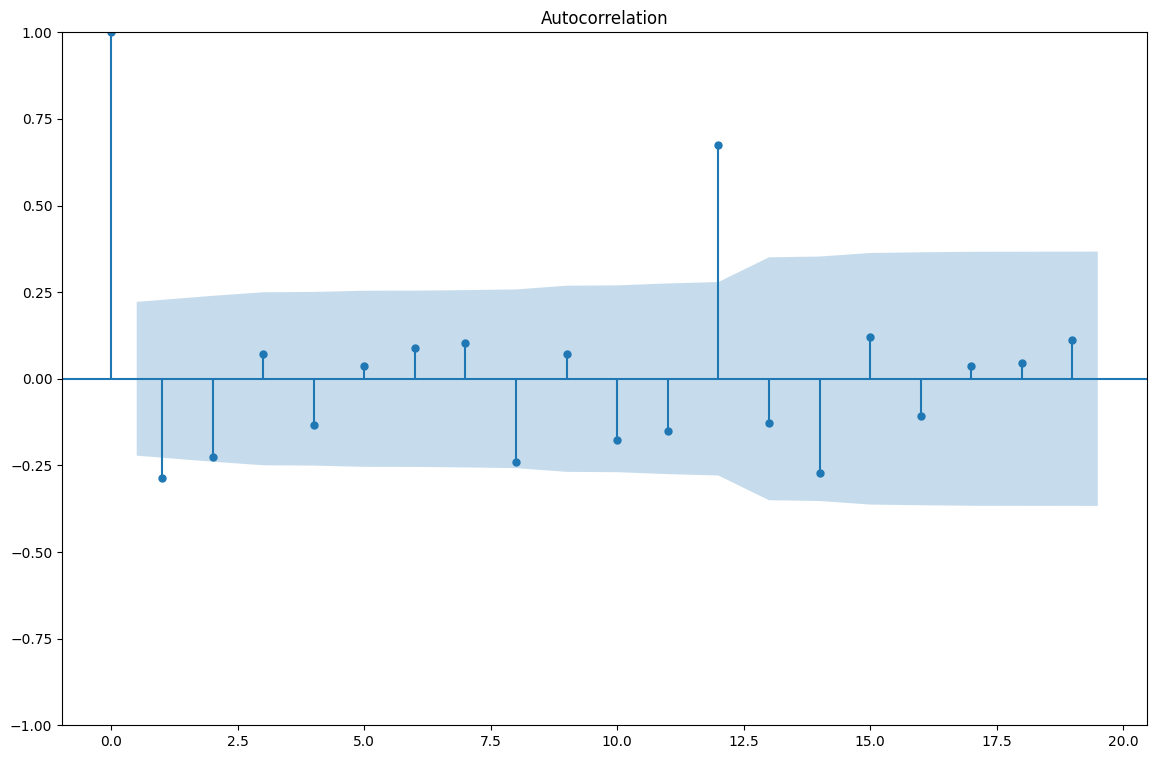

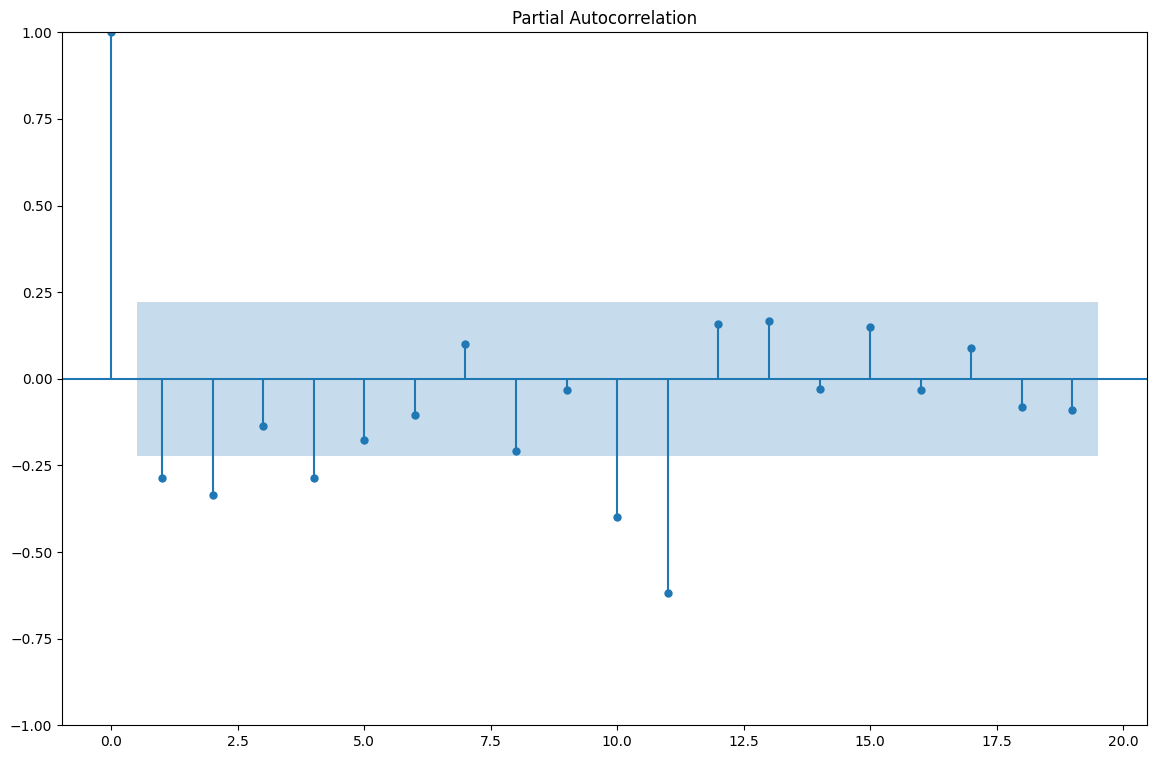

In [31]:
# Check plot ACF & PACF

plot_acf(train['Passengers'].diff().diff().dropna())
plot_pacf(train['Passengers'].diff().diff().dropna())
plt.show()

In [32]:
# Train with p=2, d=2, q=1

arima = ARIMA(train, order=(2, 2, 1))
mod_train = arima.fit()
mod_train.aic

696.4809402366599

# F. SARIMA

In [33]:
# Splitting dataset

train = passenger[:80]
test = passenger[80:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (80, 1)
Test size :  (64, 1)


In [34]:
# Display train-set

train

,Passengers
Date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1955-04-01,269
1955-05-01,270
1955-06-01,315


In [35]:
# Display train-set

test

,Passengers
Date,
1955-09-01,312
1955-10-01,274
1955-11-01,237
1955-12-01,278
1956-01-01,284
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [36]:
# Train using SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAX

sar=SARIMAX(train['Passengers'], order=(2, 2, 2),seasonal_order=(2, 2, 2, 12)).fit()
sar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Passengers   No. Observations:                   80
Model:             SARIMAX(2, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -213.664
Date:                            Mon, 04 Sep 2023   AIC                            445.328
Time:                                    08:36:10   BIC                            463.229
Sample:                                01-01-1949   HQIC                           452.232
                                     - 08-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8663      1.256     -0.690      0.490      -3.328       1.596
ar.L2         -0.0896      0.475     -0.189      0.850      -1.021       0.842
ma.L1         -0.3816      2.075     -0.184      0.854      -4.449       3.685
ma.L2         -0.6082      1.220     -0.499      0.618      -2.999       1.782
ar.S.L12      -1.2480      3.002     -0.416      0.678      -7.132       4.636
ar.S.L24      -0.3933      0.447     -0.879      0.379      -1.270       0.484
ma.S.L12       0.1417     62.314      0.002      0.998    -121.991     122.274
ma.S.L24      -0.8477     56.557     -0.015      0.988    -111.698     110.003
sigma2        87.8516   5487.324      0.016      0.987   -1.07e+04    1.08e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.29
Prob(Q):                              0.83   Prob(JB):                         0.87
Heteroskedasticity (H):               1.28   Skew:                             0.10
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Predict test-set

## Predict test-set
sar_pred_test = sar.predict(start="1955-09-01", end="1960-12-01", dynamic=True)
sar_pred_test = pd.DataFrame(sar_pred_test)
sar_pred_test.columns = ['Passengers_predict']

## Concate with actual test-set
act_vs_pred_sar=pd.concat([test, sar_pred_test], axis=1)
act_vs_pred_sar

,Passengers,Passengers_predict
1955-09-01,312,308.490375
1955-10-01,274,275.386477
1955-11-01,237,246.016297
1955-12-01,278,273.761969
1956-01-01,284,287.935509
...,...,...
1960-08-01,606,700.988476
1960-09-01,508,640.881391
1960-10-01,461,596.439815
1960-11-01,390,555.838946


In [38]:
# Check the MAE & RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

print('MAE test  : ', mean_absolute_error(test, sar_pred_test))
print('RMSE test : ', np.sqrt(mean_squared_error(test, sar_pred_test)))

MAE test  :  60.440321614158634
RMSE test :  77.57028788749346
